In [25]:
import pandas as pd
import os
from collections import Counter
import prince
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
os.chdir('/content/drive/My Drive/HKU/MSBA 7018 Markting Analytics/Group Project/Weibo Tag')

In [213]:
files = os.listdir()

In [214]:
comb_data=pd.DataFrame()
for f in files:
    if f.endswith('_o.csv'):
        df = pd.read_csv(f,index_col=0)
        df['from'] = f.split('_')[0]
        df.drop_duplicates(keep='first',inplace=True)
        comb_data = pd.concat([comb_data,df],ignore_index=True)

In [215]:
len(comb_data)

2780

In [216]:
comb_data.head()

,name,uid,gender,region,tag,from
0,潮流风景线,https://weibo.com/u/2700753641,male,河南,"闺女徐贤要幸福, 罗塘人家, 爱情小白, 凯迪拉克SRX",凯迪拉克
1,扣_扣_扣扣篮,https://weibo.com/szeyuen1008,male,广东,"英语, 篮球, 爱狗, 衛蘭, 周傑倫, 保时捷, 凯迪拉克, 别克, 雷克萨斯, 起亚",凯迪拉克
2,凯迪拉克长春宏明品鉴中心,https://weibo.com/726260820,male,吉林,"凯迪拉克, 促销, 管理, 销售, 营销, 市场, 百年历史, 美国品牌, 豪华车, 汽车",凯迪拉克
3,北巷草猫,https://weibo.com/libamao,male,江苏,"IT数码, 军事, 旅游, 新闻资讯, 汽车, 打球, 凯迪拉克",凯迪拉克
4,凯迪拉克大本营,https://weibo.com/u/2375199402,male,广东,"凯迪拉克, CTS, 轿跑, 钻石切割, SLS, 凯雷德, 豪华车, SRX, 汽车, 赛威",凯迪拉克


In [217]:
stat_table = pd.DataFrame()
brand_name = list(set(comb_data['from']))
for brand in brand_name:
    sub = comb_data.loc[comb_data['from']==brand]
    tot = len(sub)
    tag_lst = sub['tag'].to_list()
    result = []
    for tags in tag_lst:
        ele = tags.split(', ')
        result = result + ele
    counter1 = Counter(result)
    counter2 = {}
    for tag,num in counter1.items():
        if num > 10 and tag not in brand_name and tag != " ":
            counter2[tag]=num
    stat = pd.DataFrame(data = counter2, index=[brand])
    stat_table = pd.concat([stat_table, stat], axis=0)


In [218]:
stat_table = stat_table.fillna(0.001).T
stat_table

,凯迪拉克,宝马,奔驰,奥迪,沃尔沃,雷克萨斯
篮球,14.000,0.001,0.001,0.001,0.001,12.000
汽车,49.000,106.000,89.000,87.000,72.000,55.000
IT数码,13.000,0.001,0.001,0.001,0.001,0.001
旅游,54.000,43.000,45.000,46.000,35.000,30.000
,11.000,56.000,45.000,32.000,33.000,18.000
...,...,...,...,...,...,...
林海峰,0.001,0.001,0.001,0.001,47.000,0.001
三菱沃尔沃宾利,0.001,0.001,0.001,0.001,18.000,0.001
沃尔沃天籁,0.001,0.001,0.001,0.001,14.000,0.001
丰田,0.001,0.001,0.001,0.001,0.001,13.000


In [219]:
adj_table = pd.DataFrame()
for row in range(len(stat_table)):
    sub = stat_table.iloc[row,].tolist()
    if max(sub)>2*min(sub):
        adj_table = pd.concat([adj_table,stat_table.iloc[row:row+1,]])
    

In [220]:
adj_table

,凯迪拉克,宝马,奔驰,奥迪,沃尔沃,雷克萨斯
篮球,14.000,0.001,0.001,0.001,0.001,12.000
汽车,49.000,106.000,89.000,87.000,72.000,55.000
IT数码,13.000,0.001,0.001,0.001,0.001,0.001
,11.000,56.000,45.000,32.000,33.000,18.000
电影,52.000,27.000,44.000,47.000,21.000,23.000
...,...,...,...,...,...,...
林海峰,0.001,0.001,0.001,0.001,47.000,0.001
三菱沃尔沃宾利,0.001,0.001,0.001,0.001,18.000,0.001
沃尔沃天籁,0.001,0.001,0.001,0.001,14.000,0.001
丰田,0.001,0.001,0.001,0.001,0.001,13.000


In [221]:
ca=prince.CA(
     n_components=2,
     n_iter=20,
     copy=True,
     check_input=True,
     engine='auto',
     random_state=44
)
stat_table.columns.rename("carnames",inplace=True)
stat_table.index.rename("tags",inplace=True)
ca=ca.fit(adj_table)

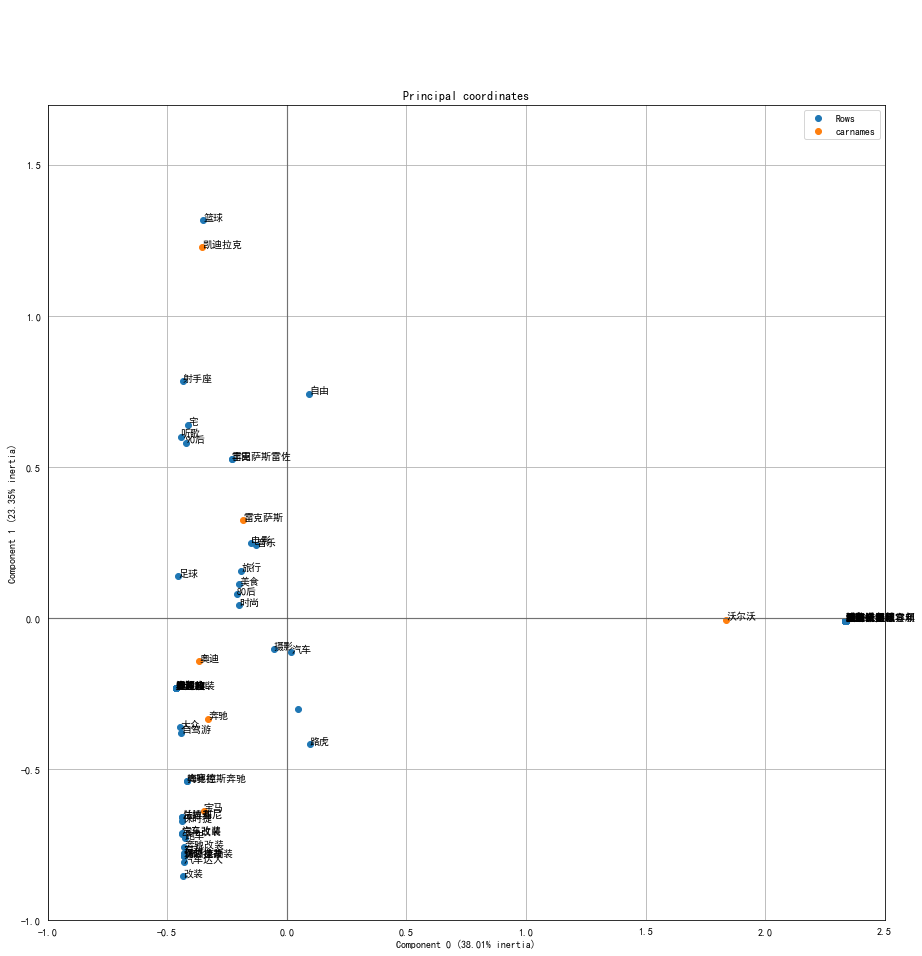

In [222]:
ax = ca.plot_coordinates(
    X=adj_table,
    ax=None,
    figsize=(15,15),
    x_component=0,
    y_component=1,
    show_row_labels=True,
    show_col_labels=True
)
plt.xlim(-1,2.5)
plt.ylim(-1,1.7)
plt.rcParams['font.sans-serif']=['SimHei'] #显示中文标签
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.size'] = 10
ax.get_figure().savefig('figure.png')
#ax.get_figure()